# Wine Quality (Ordinal Regression)
## Data Cleaning, Exploration and Wrangling

### Source
- https://archive.ics.uci.edu/ml/datasets/Wine+Quality
- http://www3.dsi.uminho.pt/pcortez/wine/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from eda import plot_corr_mat, evaluate_regression, plot_regression

In [3]:
df_rd = pd.read_csv('lake/wine_quality/winequality-red.csv')
df_wt = pd.read_csv('lake/wine_quality/winequality-white.csv')
print(df_rd.shape, df_wt.shape)

(1599, 12) (4898, 12)


In [4]:
df_rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Merge Datasets

In [5]:
df_rd['type'] = 'red'
df_wt['type'] = 'white'

In [7]:
df = pd.concat([df_rd, df_wt], axis=0).reindex()
df.to_csv('lake/wine_quality/winequality.csv', index=False)

### Type of Features

In [6]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')


In [7]:
#Numerical Features
num_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol', 'quality']
df[num_cols].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<AxesSubplot:>

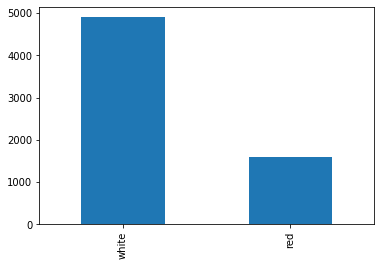

In [8]:
# Categorical
df.type.value_counts().plot.bar()

### Missing Values

In [9]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

### Duplicated Values

In [10]:
# Red Wines
df_rd[df_rd.duplicated(keep=False)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,red
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5,red
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,red
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5,red
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5,red
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red


In [11]:
# White Wines
df_wt[df_wt.duplicated(keep=False)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5,white
4855,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6,white
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6,white
4879,6.6,0.34,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,6,white


### Feature Exploration

In [12]:
from pandas_profiling import ProfileReport
# profile = ProfileReport(df_wt, title="Pandas Profiling Report")
# profile.to_widgets()

In [13]:
# sns.pairplot(df_wt)

### Correlation Analysis

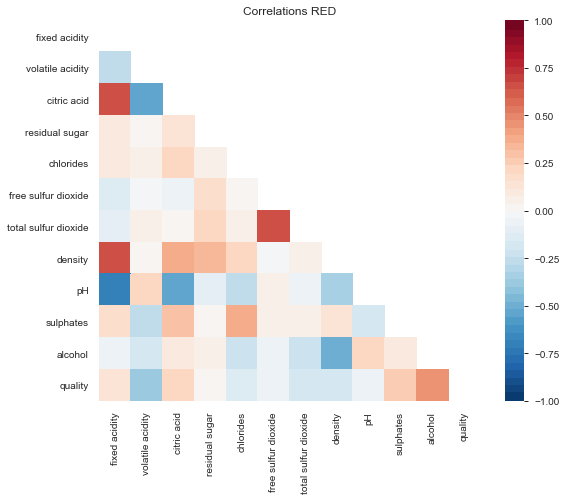

In [14]:
def plot_corr_mat(data, title):
    correlations = data.corr()
    mask = np.zeros_like(correlations)
    mask[np.triu_indices_from(mask)] = True
    plt.subplots(figsize=(9, 7)); plt.title(title) 
    sns.heatmap(correlations, vmin=-1, vmax=1, mask=mask,
                square=True, center=0, cmap=sns.color_palette("RdBu_r", 50))
plot_corr_mat(df_rd, "Correlations RED")

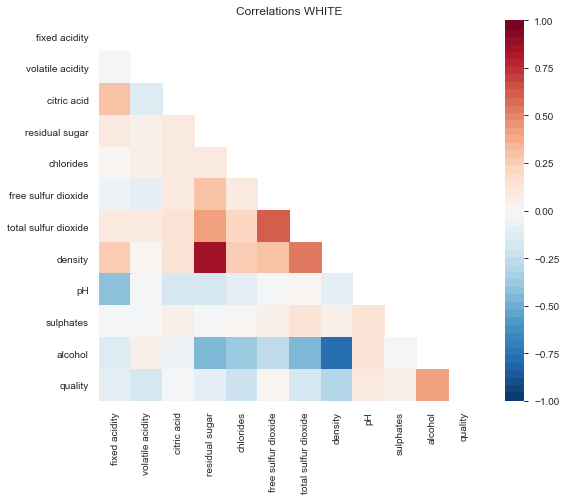

In [15]:
plot_corr_mat(df_wt, "Correlations WHITE")

### Outliers Analysis

In [16]:
#...

## Building Models
### White Wine

In [23]:
# Linear Regression
pd.options.display.float_format = "{:,.6f}".format
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']
X = df_wt[features]
y = df_wt.quality
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)
print(X_train.shape, X_test.shape)
print(y_test.shape, y_test.shape)

(3673, 11) (1225, 11)
(1225,) (1225,)


In [19]:
# Raw Features
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
pd.DataFrame({'Actuals': y_test, 'Predictions': y_pred})

,Actuals,Predictions
2384,8,5.978097
3677,6,6.020323
2080,5,5.143125
2578,7,6.763328
401,5,5.350146
...,...,...
1148,6,6.125098
228,6,5.826942
2627,7,6.080134
1527,6,5.897154


In [20]:
linreg.coef_

array([ 5.77057934e-02, -1.83323452e+00,  5.96277023e-02,  8.12297590e-02,
       -7.80172157e-01,  3.22586038e-03, -1.82952279e-04, -1.48679020e+02,
        6.95269976e-01,  5.43469213e-01,  1.91811842e-01])

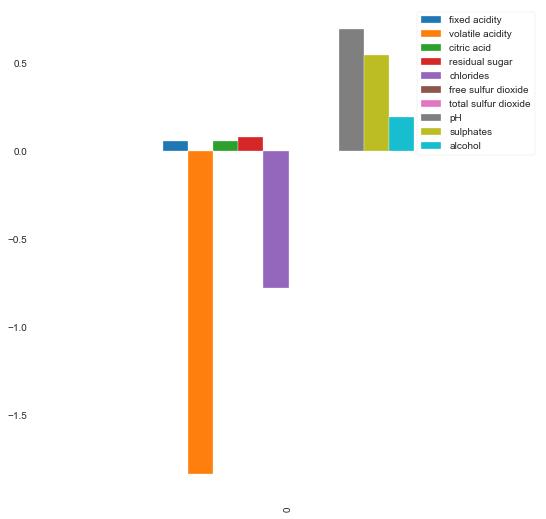

In [25]:
def coeficient_importance(linear_model, columns, excluded_cols=[]):
    coeficients = pd.DataFrame([linear_model.coef_], columns=columns)
    all_other_columns = [col for col in columns if col not in excluded_cols]
    fig, ax = plt.subplots(figsize=(9,9))
    coeficients[all_other_columns].plot.bar(ax=ax)
    
coeficient_importance(linreg, features, ['density'])

(MAE) Mean absolute error: 0.58
(MSE) Mean squared error: 0.56
(R2) Coefficient of determination: 0.28


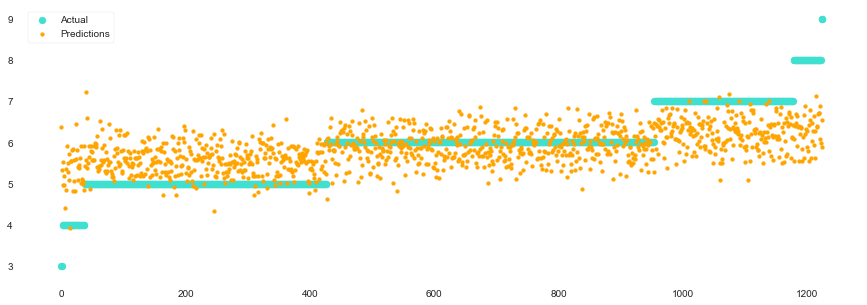

In [26]:
evaluate_regression(y_test, y_pred)
plot_regression(y_test, y_pred)

In [27]:
# SVR

from sklearn.preprocessing import StandardScaler
xscaler = StandardScaler(); x_test_scaler = StandardScaler()
yscaler = StandardScaler(); y_test_scaler = StandardScaler()
X_train_sc = xscaler.fit_transform(X_train)
y_train_sc = yscaler.fit_transform(y_train.values.reshape(-1,1))
X_test_sc = x_test_scaler.fit_transform(X_test)
y_test_sc = y_test_scaler.fit_transform(y_test.values.reshape(-1,1))

In [28]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train_sc, y_train_sc.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [29]:
y_pred_sc = svr.predict(X_test_sc)
y_pred = y_test_scaler.inverse_transform(y_pred_sc)
pd.DataFrame({'Actuals': y_test, 'Predictions': y_pred})

,Actuals,Predictions
2384,8,6.074737
3677,6,6.308759
2080,5,5.298499
2578,7,7.027849
401,5,5.030911
...,...,...
1148,6,6.183618
228,6,5.899651
2627,7,6.338159
1527,6,5.921867


(MAE) Mean absolute error: 0.52
(MSE) Mean squared error: 0.47
(R2) Coefficient of determination: 0.40


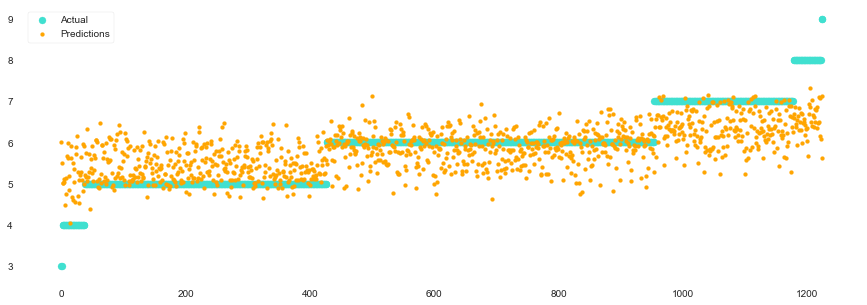

In [30]:
evaluate_regression(y_test, y_pred)
plot_regression(y_test, y_pred)